In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Función para multiplicar dos matrices
def multiplicar_matrices(A, B):
    n = len(A)
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

<ipython-input-5-2a743c664209>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


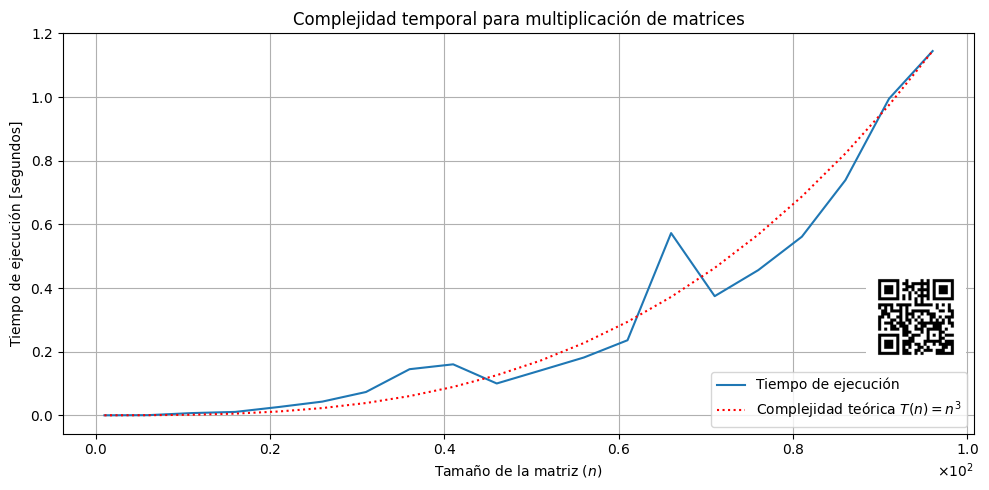

In [5]:
# Lista de tamaños de matrices para probar
tamanos_matrices = np.arange(1, 101, 5)

# Inicializar arrays para los tiempos de multiplicación de matrices
tiempos_multiplicacion = np.zeros(len(tamanos_matrices))

average = 5

# Medir el tiempo de multiplicación de matrices 5 veces para cada tamaño
for i, n in enumerate(tamanos_matrices):
    tiempos_multiplicacion_n = np.zeros(average)
    for j in range(average):
        A = np.random.randint(0, 100, size=(n, n))
        B = np.random.randint(0, 100, size=(n, n))
        start_time = time.time()
        multiplicar_matrices(A, B)
        end_time = time.time()
        tiempos_multiplicacion_n[j] = end_time - start_time
    tiempos_multiplicacion[i] = np.mean(tiempos_multiplicacion_n)

# Generar el código QR
qr_data = "https://bit.ly/3wwwg7r"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Tiempo de multiplicación de matrices
ax1.plot(tamanos_matrices, tiempos_multiplicacion, label='Tiempo de ejecución')

# Agregar la línea T(n) = O(n^3)
n_cubed = tamanos_matrices**3
# Escalar n_cubed para ajustarse a la escala de tiempos_multiplicacion
n_cubed_scaled = n_cubed * (tiempos_multiplicacion[-1] / n_cubed[-1])
ax1.plot(tamanos_matrices, n_cubed_scaled, label='Complejidad teórica $T(n) = n^3$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño de la matriz ($n$)')
ax1.set_ylabel('Tiempo de ejecución [segundos]')
ax1.set_title('Complejidad temporal para multiplicación de matrices')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.871, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

# Guardar la figura con 300 DPI
fig.savefig('complejidad_temporal_cubica.png', dpi=300)